# ImageNet

**Transfer Learning** is a type of machine learning techniques that utilizes knowledge gained by storing and solving problems, and applying it to a similar problem.

# Setting Up

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import matplotlib.pylab as plt
import tensorflow as tf

In [0]:
!pip install -q -U tf-hub-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

# Getting the Dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
base_path = 'gdrive/My Drive/dogs/data/dog-breed-identification/'
train_path = 'gdrive/My Drive/dogs/data/dog-breed-identification/train'
test_path = 'gdrive/My Drive/dogs/data/dog-breed-identification/test'
csv_train_path = 'gdrive/My Drive/dogs/data/dog-breed-identification/labels.csv'
csv_test_path = 'gdrive/My Drive/dogs/data/dog-breed-identification/sample_submission.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

labels = pd.read_csv(base_path + 'labels.csv')

labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


# Getting an Image Classifier

In [0]:
classifier_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [0]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

# Testing the Classifier

In [0]:
import numpy as np
import PIL.Image as Image

dog_test = base_path + 'train/' + labels.id[123] + ".jpg"
dog_test = Image.open(dog_test).resize(IMAGE_SHAPE)
dog_test

train_labels = labels.breed[123]
print(train_labels)

welsh_springer_spaniel


In [0]:
dog_test = np.array(dog_test)/255.0
dog_test.shape

(224, 224, 3)

In [0]:
result = classifier.predict(dog_test[np.newaxis, ...])
result.shape

(1, 1001)

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

219

Quick Predction

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


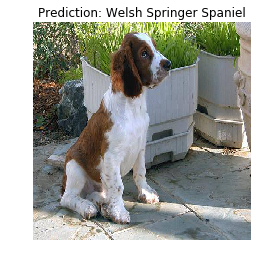

In [0]:
plt.imshow(dog_test)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

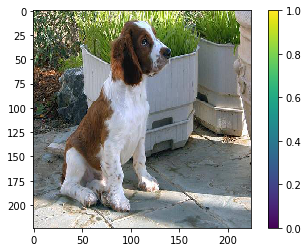

In [0]:
plt.figure()
plt.imshow(dog_test)
plt.colorbar()
plt.grid(False)
plt.show()